## Install Library

In [1]:
!pip install pyspark
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=7d507cb9d7690aea6a4d5d0564ebc23eff7934abaecc2a7e34ce3dc12dbcdd4d
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publi

## Loading Library

In [2]:
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import stddev,countDistinct,count,avg,col
from pyspark.sql.functions import when
from pyspark.sql.functions import mean

from pyspark.sql.types import IntegerType
from sklearn.impute import SimpleImputer

## Read the folder we just processed

In [3]:
data_as_csv = pd.read_csv('processed_data_with_group.csv')

In [4]:
print(data_as_csv.head())

   Grup  Numar Data_deces/externare  Stare  Varsta     Sex  \
0     1      1       5/4/2012 19:28  alive      72  Female   
1     1      2       8/28/2012 2:39  alive      75    Male   
2     1      3      11/22/2011 9:03  alive      83    Male   
3     1      4       6/20/2012 6:15  alive      43    Male   
4     1      5       7/23/2011 2:41  alive      75    Male   

   Indice_de_masa_corporala  Data_internarii Hipertensiv Fibrilatie_atriala  \
0                 37.588179  4/26/2012 22:48          nu                 nu   
1                 30.188278   8/25/2012 7:29          nu                 nu   
2                 26.572634  10/30/2011 7:37          nu                 nu   
3                 83.264629  5/28/2012 15:25          nu                 nu   
4                 31.824842   7/3/2011 20:25          da                 nu   

   ... Sodiu_din_sange Calciu_din_sange     Clorura Interval_anionic  \
0  ...      138.750000         7.463636  109.166667        13.166667   
1  ...  

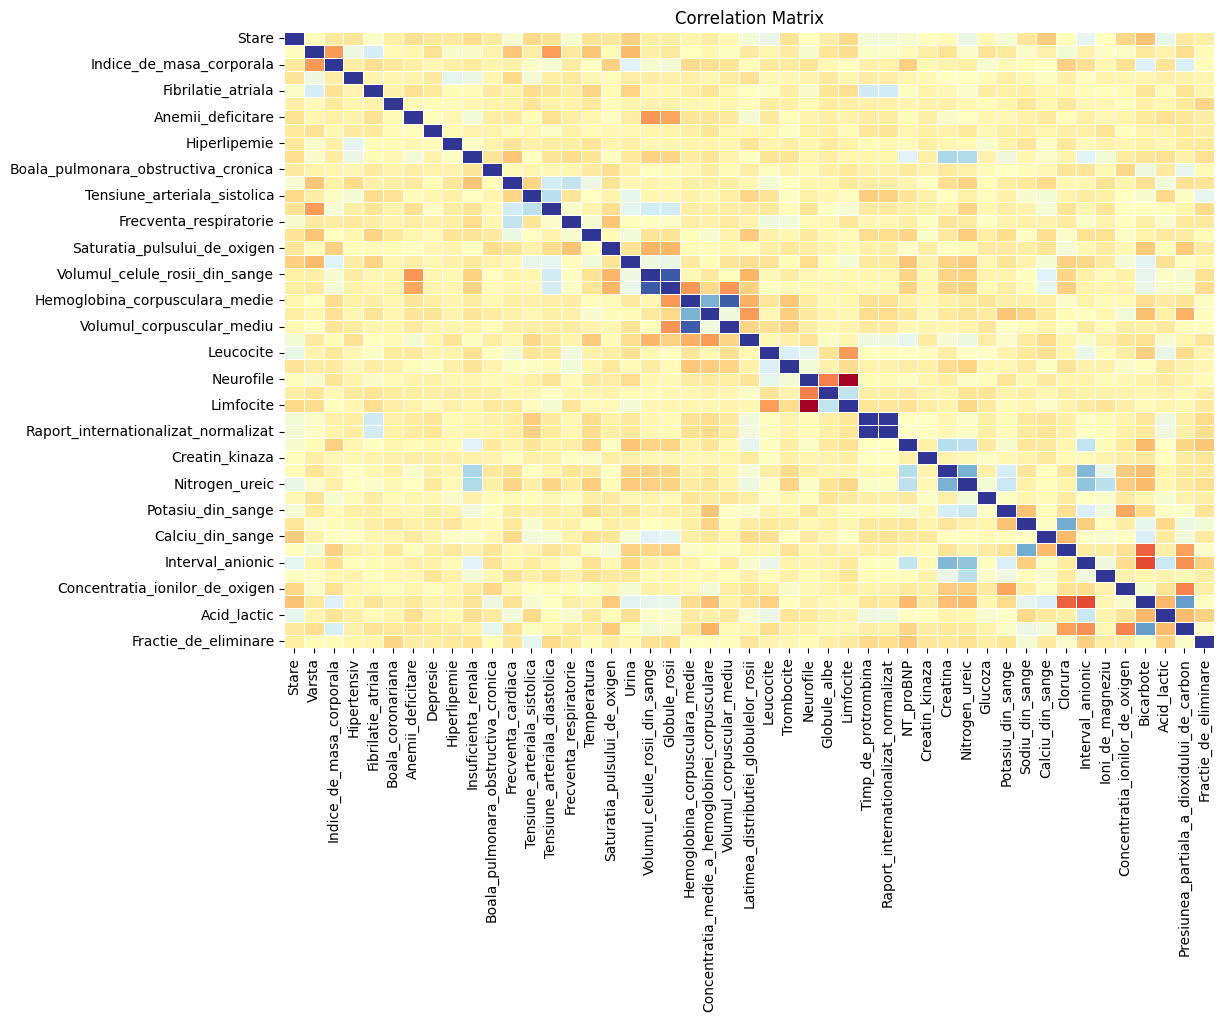

                                                                                          Correlation
Globule_albe                                   Latimea_distributiei_globulelor_rosii         0.100183
Stare                                          Fibrilatie_atriala                            0.100975
Creatin_kinaza                                 Glucoza                                       0.101857
Insuficienta_renala                            Calciu_din_sange                              0.104333
Clorura                                        Fractie_de_eliminare                          0.104655
Ioni_de_magneziu                               Glucoza                                       0.104947
Nitrogen_ureic                                 Neurofile                                     0.105517
Varsta                                         Sodiu_din_sange                               0.105644
Potasiu_din_sange                              Latimea_distributiei_globulelor_ros

In [5]:
from sklearn.impute import SimpleImputer

dataframe = data_as_csv

# ----------------Target Column-------------------------------------------------
dataframe['Stare'] = dataframe['Stare'].replace({'alive': 0, 'dead': 1})
# --------------------Categorical Columns---------------------------------------
dataframe['Hipertensiv'] = dataframe['Hipertensiv'].replace({'nu': 0,'da': 1})
dataframe['Fibrilatie_atriala'] = dataframe['Fibrilatie_atriala'].replace({'nu': 0,'da': 1})
dataframe['Boala_coronariana'] = dataframe['Boala_coronariana'].replace({'nu': 0,'da': 1})
dataframe['Anemii_deficitare'] = dataframe['Anemii_deficitare'].replace({'nu': 0,'da': 1})
dataframe['Depresie'] = dataframe['Depresie'].replace({'nu': 0,'da': 1})
dataframe['Hiperlipemie'] = dataframe['Hiperlipemie'].replace({'nu': 0,'da': 1})
dataframe['Insuficienta_renala'] = dataframe['Insuficienta_renala'].replace({'nu': 0,'da': 1})
dataframe['Boala_pulmonara_obstructiva_cronica'] = dataframe['Boala_pulmonara_obstructiva_cronica'].replace({'nu': 0,'da': 1})
# ------------------------------------------------------------------------------

label_x = dataframe.drop(columns='Stare')
label_y = dataframe[['Stare']]

simpleImp = SimpleImputer(missing_values=np.nan, strategy='mean')
column = label_x.select_dtypes(include='float64').columns

simpleImp.fit(label_x[column])
label_x[column] = simpleImp.transform(label_x[column])

SimpleImp =  SimpleImputer(missing_values=np.nan, strategy="most_frequent")
SimpleImp.fit(label_y)

label_y = SimpleImp.transform(label_y)
label_y = pd.DataFrame(label_y, columns=['Stare'], dtype='int64')

df = label_x.copy()
df['Stare'] = label_y
df.groupby(by=('Grup')).describe().round().T
col = ['Stare','Varsta','Sex','Indice_de_masa_corporala','Hipertensiv','Fibrilatie_atriala','Boala_coronariana','Diabet','Anemii_deficitare','Depresie','Hiperlipemie','Insuficienta_renala','Boala_pulmonara_obstructiva_cronica','Frecventa_cardiaca','Tensiune_arteriala_sistolica','Tensiune_arteriala_diastolica','Frecventa_respiratorie','Temperatura','Saturatia_pulsului_de_oxigen','Urina','Volumul_celule_rosii_din_sange','Globule_rosii','Hemoglobina_corpusculara_medie','Concentratia_medie_a_hemoglobinei_corpusculare','Volumul_corpuscular_mediu','Latimea_distributiei_globulelor_rosii','Leucocite','Trombocite','Neurofile','Globule_albe','Limfocite','Timp_de_protrombina','Raport_internationalizat_normalizat','NT_proBNP','Creatin_kinaza','Creatina','Nitrogen_ureic','Glucoza','Potasiu_din_sange','Sodiu_din_sange','Calciu_din_sange','Clorura','Interval_anionic','Ioni_de_magneziu','Concentratia_ionilor_de_oxigen','Bicarbote','Acid_lactic','Presiunea_partiala_a_dioxidului_de_carbon','Fractie_de_eliminare']
corr = df[col].corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='RdYlBu', linewidths=0.5, cbar=False);
# Create the heatmap
plt.tick_params(axis='both', labelsize=10)
# Add a title
plt.title("Correlation Matrix", fontsize=12)
# Display the heatmap
plt.show()

corr_df = pd.DataFrame(corr.unstack().sort_values(ascending=False), columns=['Correlation'])
corr_df = corr_df.drop_duplicates().dropna()
corr_df = corr_df[corr_df['Correlation'] > 0.1 ]
top_pairs = corr_df.nsmallest(60, 'Correlation')
print(top_pairs)

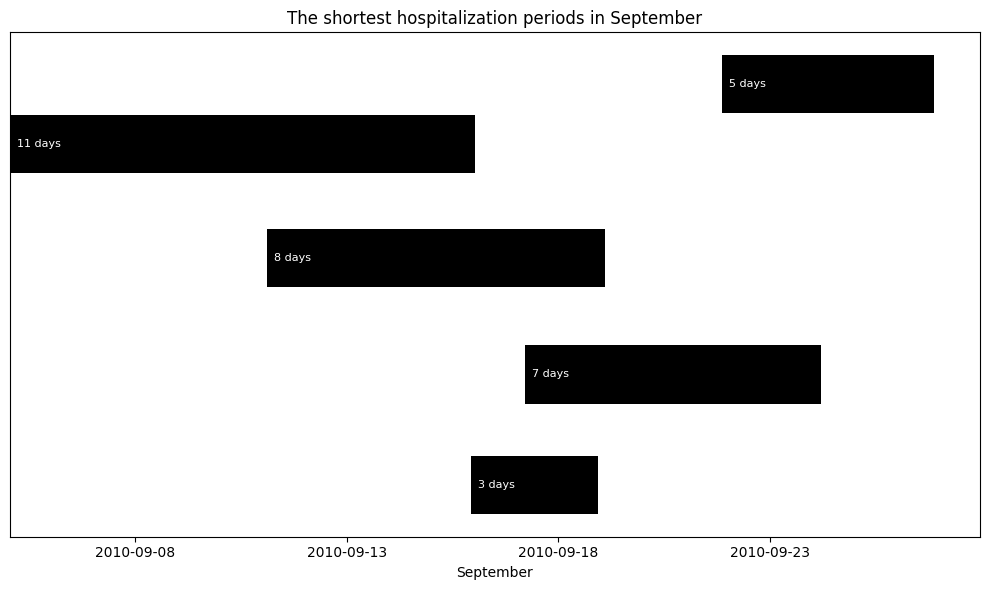

In [6]:
calendar = data_as_csv

calendar['Data_internarii'] = pd.to_datetime(calendar['Data_internarii'])

# Convertirea coloanei "data_externare" în formatul dorit
calendar['Data_deces/externare'] = pd.to_datetime(calendar['Data_deces/externare'])

calendar['durata_internare'] = (data_as_csv['Data_deces/externare'] - data_as_csv['Data_internarii']).dt.days

# Selectarea celor mai mici valori distincte din coloana "durata_internare"
df_unique = calendar['durata_internare'].nsmallest(len(calendar['durata_internare'])).drop_duplicates().head(13).copy()

# Crearea unui nou DataFrame cu valorile selectate
df_new = calendar[calendar['durata_internare'].isin(df_unique)].copy()
df_new = df_new.head(100)
# Afișarea noului DataFrame
df_new = df_new[['Data_internarii','Data_deces/externare','durata_internare']]
#print(df_new)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filtrăm înregistrările în care luna internării este aprilie
df_filtered = df_new[df_new['Data_internarii'].dt.month == 9]
df_filtered = df_filtered[df_filtered['Data_internarii'].dt.year == 2010]
df = df_filtered
# Convertirea coloanelor de date la tipul de date datetime
df['Data_internarii'] = pd.to_datetime(df['Data_internarii'])
df['Data_deces/externare'] = pd.to_datetime(df['Data_deces/externare'])

# Sortarea DataFrame-ului după coloana 'Data_internarii'
df = df.sort_values('Data_internarii')

# Crearea Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Stilizarea dimensiunilor figurii

# Iterarea prin fiecare înregistrare și adăugarea barelor în Gantt chart
for i, row in df.iterrows():
    data_internarii = row['Data_internarii']
    data_externare = row['Data_deces/externare']
    durata_internare = row['durata_internare']
    ax.barh(i, durata_internare, left=data_internarii, height=30, align='center', color='black')  # Stilizarea barelor
    ax.text(data_internarii, i, f'  {durata_internare} days', va='center', ha='left', color='white', fontsize=8)  # Stilizarea textului

# Configurarea aspectului Gantt chart
ax.set_xlabel('September')
ax.set_ylabel('Pacients')
ax.set_title('The shortest hospitalization periods in September')
ax.yaxis.grid(True)
ax.invert_yaxis()

# Stilizarea axei x ca axă cronologică
date_format = mdates.DateFormatter('%Y-%m-%d')  # Formatul dorit al etichetelor
ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()


ax.yaxis.set_visible(False)
#ax.yaxis.grid(False)
#y_locs = np.arange(len(df))
#y_ticks = y_locs + 255
#ax.set_yticks(y_ticks)
#ax.set_yticklabels(df.index)
# Afișarea Gantt chart
plt.tight_layout()
plt.show()

In [7]:
import plotly.graph_objects as go
import random

X = 'Timp_de_protrombina'
Y = 'Raport_internationalizat_normalizat'

vector_colorscale = ['Rainbow','YlOrRd','RdBu','Viridis','Jet']
color= random.choice(vector_colorscale)
size_of_points = 50


fig = go.Figure(data=go.Scatter(
    x=data_as_csv[X],
    y=data_as_csv[Y],
    mode='markers',
    marker=dict(
        size=size_of_points,
        color=data_as_csv[Y],
        colorscale=color,
        line=dict(
            color='black', 
            width=1),
        showscale=False
    ),
    hovertemplate=f'{X}: %{{x}}<br>{Y}: %{{y}}<extra></extra>'

))

fig.update_layout(
    hovermode='closest',
    height=800,
    width=1000
)

# Ascunde legenda
fig.update_layout()

# Afișează scatter plot-ul interactiv
fig.show()

In [8]:
import plotly.graph_objects as go
import random

X = 'Sodiu_din_sange'
Y = 'Clorura'

vector_colorscale = ['Rainbow','YlOrRd','RdBu','Viridis','Jet']
color= random.choice(vector_colorscale)
size_of_points = 50


fig = go.Figure(data=go.Scatter(
    x=data_as_csv[X],
    y=data_as_csv[Y],
    mode='markers',
    marker=dict(
        size=size_of_points,
        color=data_as_csv[Y],
        colorscale=color,
        line=dict(
            color='black', 
            width=1),
        showscale=False
    ),
    hovertemplate=f'{X}: %{{x}}<br>{Y}: %{{y}}<extra></extra>'

))

fig.update_layout(
    hovermode='closest',
    height=800,
    width=1000
)

# Ascunde legenda
fig.update_layout()

# Afișează scatter plot-ul interactiv
fig.show()

In [9]:
import plotly.graph_objects as go
import random

X = 'Interval_anionic'
Y = 'Creatina'

vector_colorscale = ['Rainbow','YlOrRd','RdBu','Viridis','Jet']
color= random.choice(vector_colorscale)
size_of_points = 50


fig = go.Figure(data=go.Scatter(
    x=data_as_csv[X],
    y=data_as_csv[Y],
    mode='markers',
    marker=dict(
        size=size_of_points,
        color=data_as_csv[Y],
        colorscale=color,
        line=dict(
            color='black', 
            width=1),
        showscale=False
    ),
    hovertemplate=f'{X}: %{{x}}<br>{Y}: %{{y}}<extra></extra>'

))

fig.update_layout(
    hovermode='closest',
    height=800,
    width=1000
)

# Ascunde legenda
fig.update_layout()

# Afișează scatter plot-ul interactiv
fig.show()

In [10]:
import plotly.graph_objects as go
import random

X = 'Creatina'
Y = 'NT_proBNP'

vector_colorscale = ['Rainbow','YlOrRd','RdBu','Viridis','Jet']
color= random.choice(vector_colorscale)
size_of_points = 50


fig = go.Figure(data=go.Scatter(
    x=data_as_csv[X],
    y=data_as_csv[Y],
    mode='markers',
    marker=dict(
        size=size_of_points,
        color=data_as_csv[Y],
        colorscale=color,
        line=dict(
            color='black', 
            width=1),
        showscale=False
    ),
    hovertemplate=f'{X}: %{{x}}<br>{Y}: %{{y}}<extra></extra>'

))

fig.update_layout(
    hovermode='closest',
    height=800,
    width=1000
)

# Ascunde legenda
fig.update_layout()

# Afișează scatter plot-ul interactiv
fig.show()

In [11]:
import plotly.graph_objects as go
import random

X = 'Tensiune_arteriala_sistolica'
Y = 'Tensiune_arteriala_diastolica'

vector_colorscale = ['Rainbow','YlOrRd','RdBu','Viridis','Jet']
color= random.choice(vector_colorscale)
size_of_points = 50


fig = go.Figure(data=go.Scatter(
    x=data_as_csv[X],
    y=data_as_csv[Y],
    mode='markers',
    marker=dict(
        size=size_of_points,
        color=data_as_csv[Y],
        colorscale=color,
        line=dict(
            color='black', 
            width=1),
        showscale=False
    ),
    hovertemplate=f'{X}: %{{x}}<br>{Y}: %{{y}}<extra></extra>'

))

fig.update_layout(
    hovermode='closest',
    height=800,
    width=1000
)

# Ascunde legenda
fig.update_layout()

# Afișează scatter plot-ul interactiv
fig.show()

In [12]:
import plotly.graph_objects as go
import random

X = 'Frecventa_respiratorie'
Y = 'Frecventa_cardiaca'

vector_colorscale = ['Rainbow','YlOrRd','RdBu','Viridis','Jet']
color= random.choice(vector_colorscale)
size_of_points = 50


fig = go.Figure(data=go.Scatter(
    x=data_as_csv[X],
    y=data_as_csv[Y],
    mode='markers',
    marker=dict(
        size=size_of_points,
        color=data_as_csv[Y],
        colorscale=color,
        line=dict(
            color='black', 
            width=1),
        showscale=False
    ),
    hovertemplate=f'{X}: %{{x}}<br>{Y}: %{{y}}<extra></extra>'

))

fig.update_layout(
    hovermode='closest',
    height=800,
    width=1000
)

# Ascunde legenda
fig.update_layout()

# Afișează scatter plot-ul interactiv
fig.show()

In [13]:
import plotly.graph_objects as go
import random

X = 'Interval_anionic'
Y = 'NT_proBNP'

vector_colorscale = ['Rainbow','YlOrRd','RdBu','Viridis','Jet']
color= random.choice(vector_colorscale)
size_of_points = 50


fig = go.Figure(data=go.Scatter(
    x=data_as_csv[X],
    y=data_as_csv[Y],
    mode='markers',
    marker=dict(
        size=size_of_points,
        color=data_as_csv[Y],
        colorscale=color,
        line=dict(
            color='black', 
            width=1),
        showscale=False
    ),
    hovertemplate=f'{X}: %{{x}}<br>{Y}: %{{y}}<extra></extra>'

))

fig.update_layout(
    hovermode='closest',
    height=800,
    width=1000
)

# Ascunde legenda
fig.update_layout()

# Afișează scatter plot-ul interactiv
fig.show()

<Figure size 800x600 with 0 Axes>

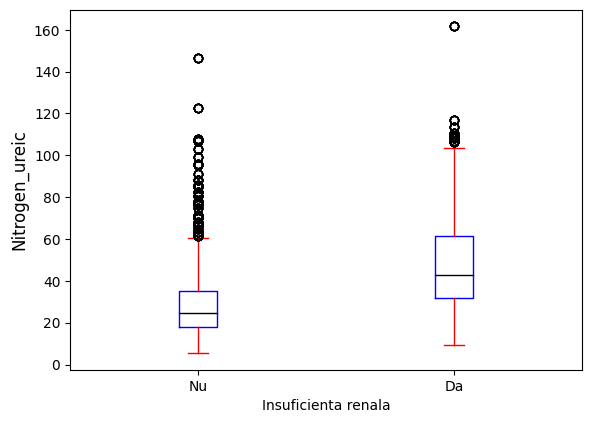

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Setarea unor culori personalizate pentru fiecare categorie
colors = {'boxes': 'blue', 'whiskers': 'red','medians':'black','caps':'red'}

# Crearea graficului de cutii și mustăți cu personalizări adiționale
plt.figure(figsize=(8, 6))
bp = data_as_csv.boxplot(column='Nitrogen_ureic', by='Insuficienta_renala', grid=False, color=colors)

# Eliminarea titlului graficului
plt.suptitle('')
bp.set_title('')
# Schimbarea valorilor de pe axa x cu valorile dorite
labels = ['Nu', 'Da']
bp.set_xticklabels(labels)

# Adăugarea de etichete personalizate pentru axe
plt.xlabel('Insuficienta renala')
plt.ylabel('Nitrogen_ureic', fontsize=12)

# Afișarea graficului
plt.show()

<Figure size 800x600 with 0 Axes>

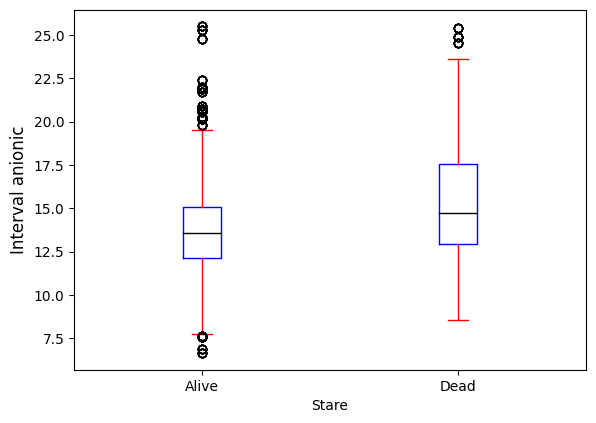

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Setarea unor culori personalizate pentru fiecare categorie
colors = {'boxes': 'blue', 'whiskers': 'red','medians':'black','caps':'red'}

# Crearea graficului de cutii și mustăți cu personalizări adiționale
plt.figure(figsize=(8, 6))
bp = data_as_csv.boxplot(column='Interval_anionic', by='Stare', grid=False, color=colors)

# Eliminarea titlului graficului
plt.suptitle('')
bp.set_title('')
# Schimbarea valorilor de pe axa x cu valorile dorite
labels = ['Alive', 'Dead']
bp.set_xticklabels(labels)

# Adăugarea de etichete personalizate pentru axe
plt.xlabel('Stare')
plt.ylabel('Interval anionic', fontsize=12)

# Afișarea graficului
plt.show()